In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
file_name = "SPC_TRADE_FOOD.csv"
file_path = "data/SPC/"

# Open CSV file in pandas
df_raw = pd.read_csv(file_path + file_name)

In [3]:
# Get column name
df_column_name = list(df_raw.columns.values)
# for el in df_column_name:
#     print(el)

In [4]:
# Get unique value of each column
# for el in df_column_name:
#     print(el)
#     print(df_raw[el].unique())

# Column detail
- DATAFLOW --> SPC:DF_TRADE_FOOD(1.0)
- FREQ: Frequency --> A: Annual
- INDICATOR: Indicator --> Q: Quantity
- IMPORTER: Importer
    - 'CK: Cook Islands' x
    - 'MH: Marshall Islands'
    - 'TO: Tonga'
    - 'VU: Vanuatu'
    - 'KI: Kiribati'
    - 'NC: New Caledonia'
    - 'NR: Nauru'
    - 'FM: Federated State of Micronesia'
    - 'PW: Palau'
    - 'NU: Niue' x
    - 'PG: Papua New Guinea'
    - 'WS: Samoa'
    - 'FJ: Fiji'
    - 'SB: Solomon Islands'
    - 'PF: French Polynesia'
    - 'TV: Tuvalu'
    - 'WF: Wallis and Futuna Islands' x
    - 'TK: Tokelau' x
- EXPORTER: Exporter --> AU_NZ: Australia and New Zealand'
- COMMODITY: Commodity -->
    - '02: Meat and edible meat offal'
    - '03: Fish, crustaceans, molluscs, aquatic invertebrates ne'
    - '04: Dairy products, eggs, honey, edible animal product nes'
    - '07: Edible vegetables and certain roots and tubers'
    - '08: Edible fruit, nuts, peel of citrus fruit, melons'
    - '09: Coffee, tea, mate and spices'
    - '10: Cereals'
    - '11: Milling products, malt, starches, inulin, wheat glute'
    - '12: Oil seed, oleagic fruits, grain, seed, fruit, etc, ne'
    - '15: Animal,vegetable fats and oils, cleavage products, et'
    - '16: Meat, fish and seafood food preparations nes'
    - '17: Sugars and sugar confectionery'
    - '18: Cocoa and cocoa preparations'
    - '19: Cereal, flour, starch, milk preparations and products'
    - '20: Vegetable, fruit, nut, etc food preparations'
    - '21: Miscellaneous edible preparations'
    - '22: Beverages, spirits and vinegar'
    - '24: Tobacco and manufactured tobacco substitutes'
- TIME_PERIOD: Time --> 1995 --> 2018
- OBS_VALUE --> quantité échangée
- UNIT_MEASURE: Unit of measure --> 'TON: tonnes'
- UNIT_MULT: Unit multiplier --> nan
- OBS_STATUS: Observation Status --> nan
- DATA_SOURCE: Data source --> nan
- OBS_COMMENT: Comment --> nan

In [5]:
# Suppression des colonnes non utiles pour l'analyse (mono valeur ou vide)
df_net = df_raw.drop(columns=['DATAFLOW', 'FREQ: Frequency', 'INDICATOR: Indicator', 'UNIT_MULT: Unit multiplier',
                          'OBS_STATUS: Observation Status', 'DATA_SOURCE: Data source', 'OBS_COMMENT: Comment', 'UNIT_MEASURE: Unit of measure', 'EXPORTER: Exporter'])
# print(df_net)


In [6]:
# Analyse n°1
total_import_ton = df_net['OBS_VALUE'].sum()
# print(total_import_ton)

df_importer_raw = df_net.groupby('IMPORTER: Importer').agg({'OBS_VALUE': 'sum'}).sort_values('OBS_VALUE', ascending=False)
df_importer_raw['PCT_OBS_VALUE'] = round(df_importer_raw['OBS_VALUE']*100/total_import_ton, 2)
df_importer_raw['PCT_OBS_VALUE_CUMSUM'] = round(df_importer_raw['PCT_OBS_VALUE'].cumsum(), 2)
# print(df_importer_raw)

(0.0, 101.0)

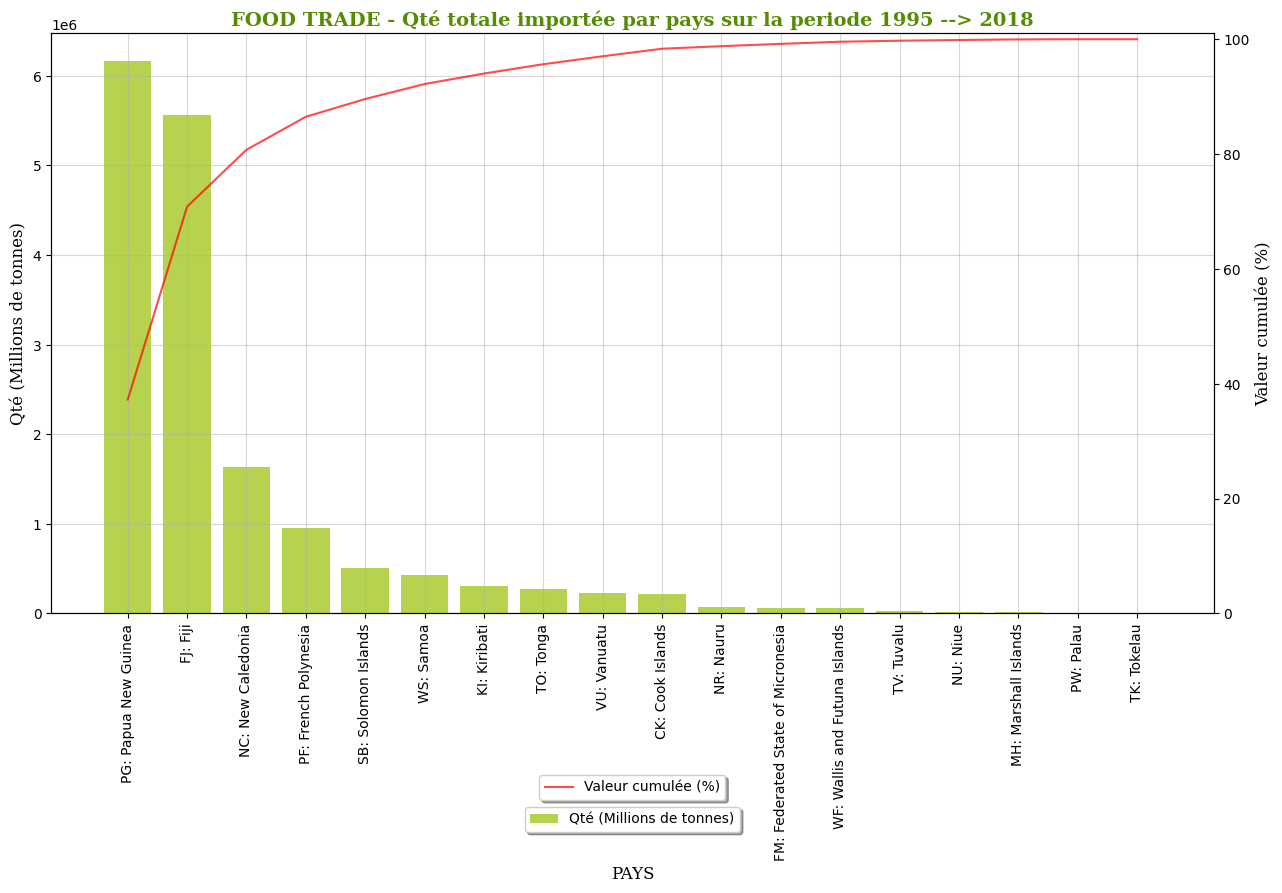

In [7]:
# Graphique
# Paramètres Titre
graph_title = "FOOD TRADE - Qté totale importée par pays sur la periode 1995 --> 2018"
title_family = 'serif'   # 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace'
title_color = '#558C03'
title_weight = 'bold'     # 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight'
title_size = 14
title_x = 0.5
title_y = 1

# Paramètres d'axes
x_label = "PAYS"
xtick_rotation = 90

xy_label_family = 'serif'
xy_label_color = 'black'
xy_label_weight = 'light'
xy_label_size = 12

y1_color = '#97BF04'
y1_alpha = 0.7
y1_label = 'Qté (Millions de tonnes)'

y2_color = 'red'
y2_alpha = 0.7
y2_label = 'Valeur cumulée (%)'

graph_linestyle = 'solid'

# Paramètres grille
grid_alpha = 0.5

###########################################################################################################
fig, axe1 = plt.subplots(nrows=1, ncols=1, figsize=(15, 10), sharex=True)
fig.subplots_adjust(bottom=0.3)

plt.xticks(rotation=xtick_rotation)

# Axe n°1
axe1.set_title(graph_title, x=title_x, y=title_y, fontdict={'family': title_family, 'color': title_color, 'weight': title_weight, 'size': title_size})
axe1.set_xlabel(x_label, fontdict={'family': xy_label_family, 'color': xy_label_color, 'weight': xy_label_weight, 'size': xy_label_size})
axe1.set_ylabel(y1_label, fontdict={'family': xy_label_family, 'color': xy_label_color, 'weight': xy_label_weight, 'size': xy_label_size})

axe1.bar(df_importer_raw.index.values, df_importer_raw.OBS_VALUE,color=y1_color, alpha=y1_alpha, label=y1_label)
axe1.legend(loc="center", bbox_to_anchor=(0, 0, 1, -0.71),ncol=1, fancybox=True, shadow=True)
axe1.grid(True, alpha=grid_alpha)

# Axe n°2
axe2 = axe1.twinx()
axe2.set_ylabel(y2_label, fontdict={'family': xy_label_family, 'color': xy_label_color, 'weight': xy_label_weight, 'size': xy_label_size})

axe2.plot(df_importer_raw.index.values, df_importer_raw.PCT_OBS_VALUE_CUMSUM,color=y2_color, linestyle=graph_linestyle, alpha=y2_alpha, label=y2_label)

axe2.legend(loc="center", bbox_to_anchor=(0, 0, 1, -0.6),ncol=1, fancybox=True, shadow=True)
axe2.set_ylim(0, 101)

In [8]:
# Analyse n°2
total_import_ton = df_net['OBS_VALUE'].sum()
df_commodity_raw = df_net.groupby('COMMODITY: Commodity').agg({'OBS_VALUE': 'sum'}).sort_values('OBS_VALUE', ascending=False)
df_commodity_raw['PCT_OBS_VALUE'] = round(df_commodity_raw['OBS_VALUE']*100/total_import_ton, 2)
df_commodity_raw['PCT_OBS_VALUE_CUMSUM'] = round(df_commodity_raw['PCT_OBS_VALUE'].cumsum(), 2)
# print(df_commodity_raw)

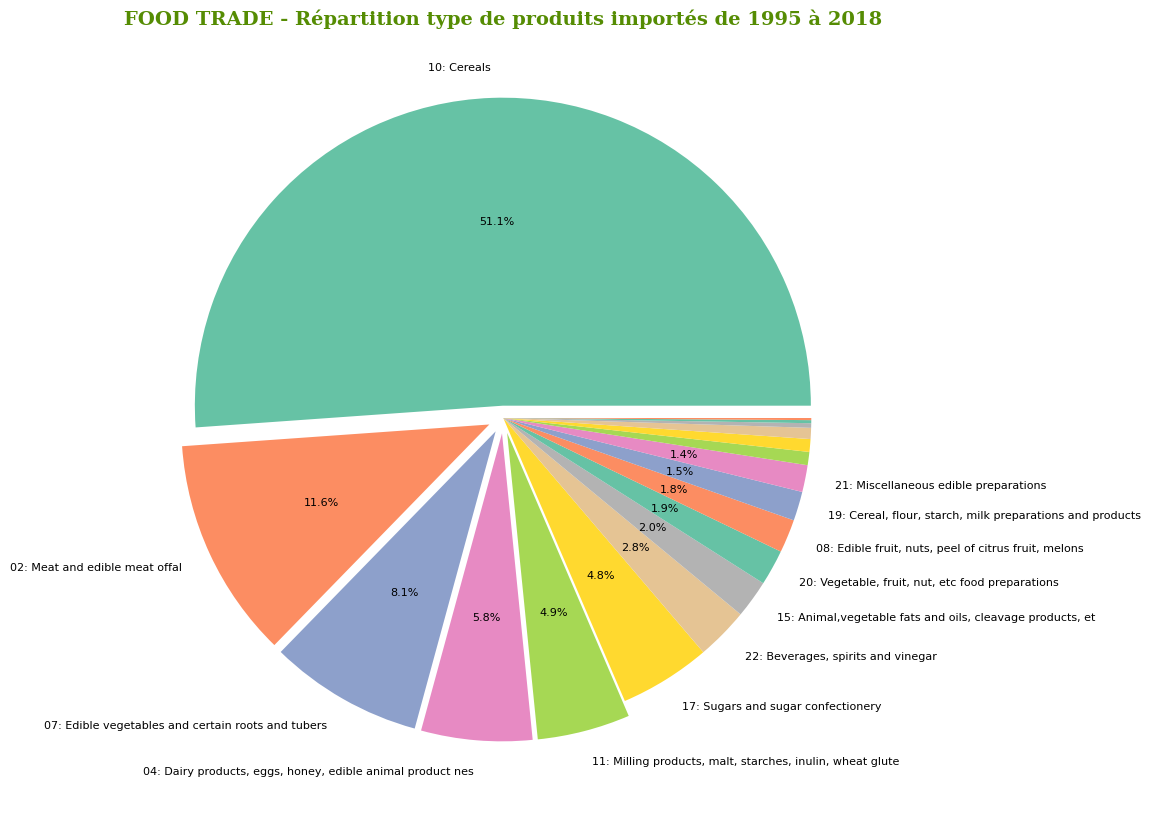

In [9]:
# Graphique
graph_title = "FOOD TRADE - Répartition type de produits importés de 1995 à 2018"
title_family = 'serif'  # 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace'
title_color = '#558C03'
# 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight'
title_weight = 'bold'
title_size = 14
title_x = 0.5
title_y = 1

fig, axe1 = plt.subplots(nrows=1, ncols=1, figsize=(20, 10), sharex=True)
axe1.set_title(graph_title, x=title_x, y=title_y, fontdict={
               'family': title_family, 'color': title_color, 'weight': title_weight, 'size': title_size})

def autopct_tunning(p): return '{:1.1f}%'.format(p) if p > 1 else None

axe1.pie(df_commodity_raw['PCT_OBS_VALUE'],
         labels=[x if df_commodity_raw.loc[df_commodity_raw.index.values == x, 'PCT_OBS_VALUE'].iloc[0] > 1 else '' for x in df_commodity_raw.index.values], 
         autopct=autopct_tunning, 
         textprops={'fontsize': 8},
         colors=sns.color_palette('Set2'),
         explode=[0.04, 0.05, 0.05, 0.05, 0.05, 0,0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0])

# axe1.legend(loc="center", bbox_to_anchor=(0, 0, 0, 0),
#             ncol=2, fancybox=True, shadow=True)

plt.show()

In [10]:
# Analyse n°3
total_import_ton = df_net['OBS_VALUE'].sum()
df_commodity_importer = df_net.groupby(['COMMODITY: Commodity', 'IMPORTER: Importer'], as_index=False).agg({'OBS_VALUE': 'sum'})
df_pivot_commodity_importer = df_commodity_importer.pivot_table(columns='IMPORTER: Importer', index='COMMODITY: Commodity', values='OBS_VALUE')
df_pivot_commodity_importer.loc[:,'Total'] = df_pivot_commodity_importer.sum(numeric_only=True, axis=1)
df_pivot_commodity_importer = df_pivot_commodity_importer.sort_values(by=['Total'], ascending=False)
df_pivot_commodity_importer = df_pivot_commodity_importer[df_pivot_commodity_importer.sum().sort_values(ascending = False).index]
df_pivot_commodity_importer = df_pivot_commodity_importer.iloc[:, :].apply(lambda x: (x*100 / x.sum()))
# print(df_pivot_commodity_importer)

In [11]:
from matplotlib.colors import LogNorm, Normalize

[Text(0, 0.5, '10: Cereals'),
 Text(0, 1.5, '02: Meat and edible meat offal'),
 Text(0, 2.5, '07: Edible vegetables and certain roots and tubers'),
 Text(0, 3.5, '04: Dairy products, eggs, honey, edible animal product nes'),
 Text(0, 4.5, '11: Milling products, malt, starches, inulin, wheat glute'),
 Text(0, 5.5, '17: Sugars and sugar confectionery'),
 Text(0, 6.5, '22: Beverages, spirits and vinegar'),
 Text(0, 7.5, '15: Animal,vegetable fats and oils, cleavage products, et'),
 Text(0, 8.5, '20: Vegetable, fruit, nut, etc food preparations'),
 Text(0, 9.5, '08: Edible fruit, nuts, peel of citrus fruit, melons'),
 Text(0, 10.5, '19: Cereal, flour, starch, milk preparations and products'),
 Text(0, 11.5, '21: Miscellaneous edible preparations'),
 Text(0, 12.5, '16: Meat, fish and seafood food preparations nes'),
 Text(0, 13.5, '03: Fish, crustaceans, molluscs, aquatic invertebrates ne'),
 Text(0, 14.5, '12: Oil seed, oleagic fruits, grain, seed, fruit, etc, ne'),
 Text(0, 15.5, '24: Tob

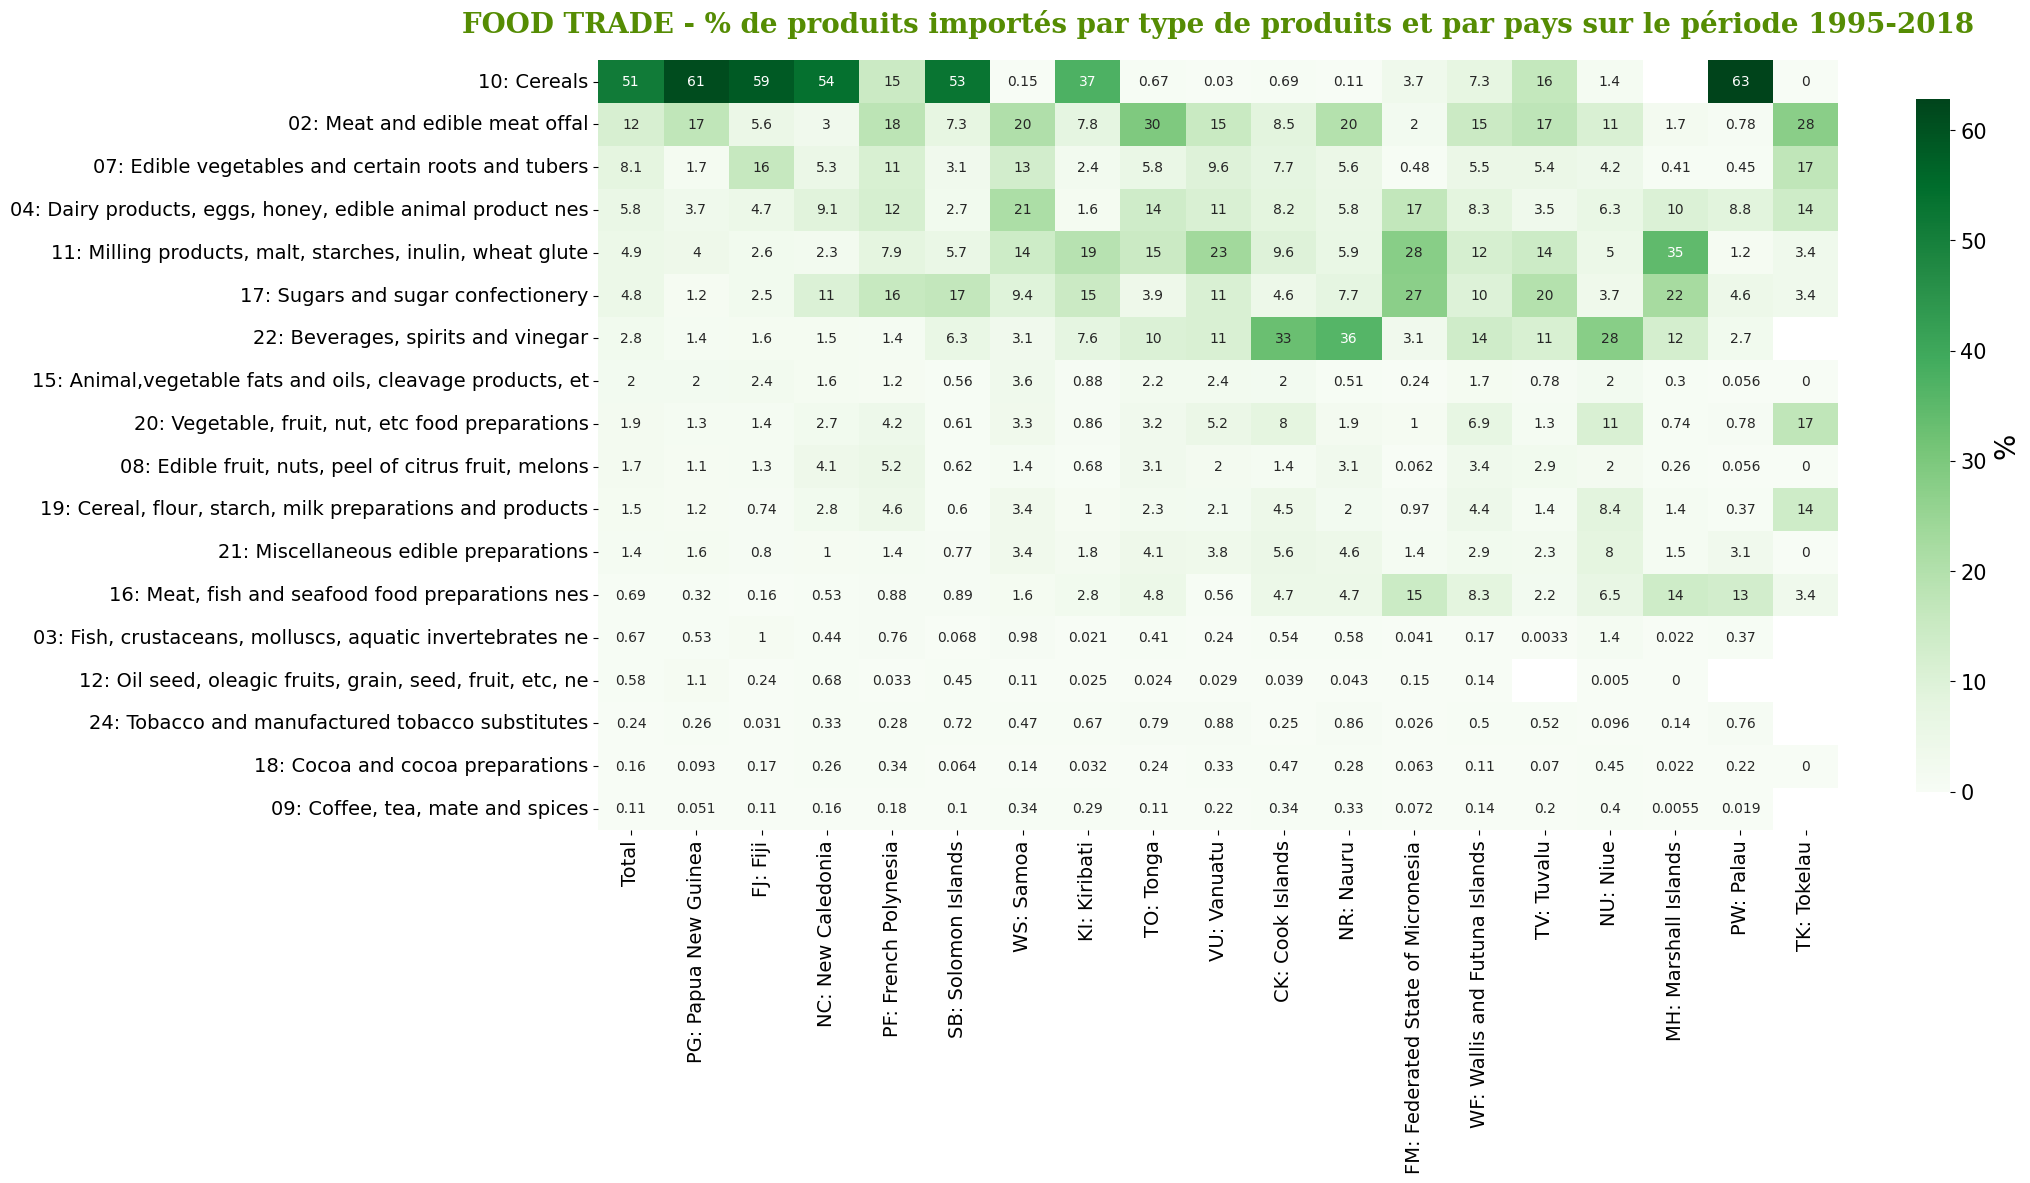

In [12]:
## GRAPHIQUE
TITLE = "FOOD TRADE - % de produits importés par type de produits et par pays sur le période 1995-2018"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) # Nombre et disposition des zones de dessin

ax.set_title(TITLE, fontdict={'family': 'serif','color' : '#558C03','weight': 'bold','size': 20},pad=20)
ax = sns.heatmap(df_pivot_commodity_importer, annot=True, square=False, cmap="Greens", cbar_kws={'label': '%', 'location' : 'right',"shrink": 0.9})
ax.set(xlabel="", ylabel="")
ax.figure.axes[-1].set_ylabel('%', size=20)
ax.figure.axes[-1].tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, rotation=0)

In [13]:
# Analyse n°4
df_importer_year = df_net.groupby(['IMPORTER: Importer','TIME_PERIOD: Time'], as_index=False).agg({'OBS_VALUE': 'sum'})
df_year = df_net.groupby(['TIME_PERIOD: Time'], as_index=False).agg({'OBS_VALUE': 'sum'})

dict_df_importer = {}
for pays in df_importer_year['IMPORTER: Importer'].unique():
    dict_df_importer[pays]=df_importer_year[df_importer_year['IMPORTER: Importer']==pays]

d = {'col1': [1, 2], 'col2': [3, 4]}

df = pd.DataFrame(data=d)
d = {}
for key, value in dict_df_importer.items():
    dict_df_importer[key]['PCT_CHANGE_MEAN'] = (dict_df_importer[key]['OBS_VALUE']-dict_df_importer[key]['OBS_VALUE'].mean())/dict_df_importer[key]['OBS_VALUE'].mean()*100
    dict_df_importer[key]['PCT_CHANGE_START'] = (dict_df_importer[key]['OBS_VALUE']-dict_df_importer[key]['OBS_VALUE'].iloc[0])/dict_df_importer[key]['OBS_VALUE'].iloc[0]*100
    mean = dict_df_importer[key]['OBS_VALUE'].mean()
    std = dict_df_importer[key]['OBS_VALUE'].std()
    d[key]={'mean':mean, 'std':std, 'pct':std/mean}
df_importer_mean = pd.DataFrame(data=d) 
df_final = df_importer_mean.transpose().sort_values(by=['pct'], ascending=False)
# print(df_final)

C:\Users\Sloutmyv\AppData\Local\Temp\ipykernel_15476\2755038590.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dict_df_importer[key]['PCT_CHANGE_MEAN'] = (dict_df_importer[key]['OBS_VALUE']-dict_df_importer[key]['OBS_VALUE'].mean())/dict_df_importer[key]['OBS_VALUE'].mean()*100
C:\Users\Sloutmyv\AppData\Local\Temp\ipykernel_15476\2755038590.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dict_df_importer[key]['PCT_CHANGE_START'] = (dict_df_importer[key]['OBS_VALUE']-dict_df_importer[key]['OBS_VAL

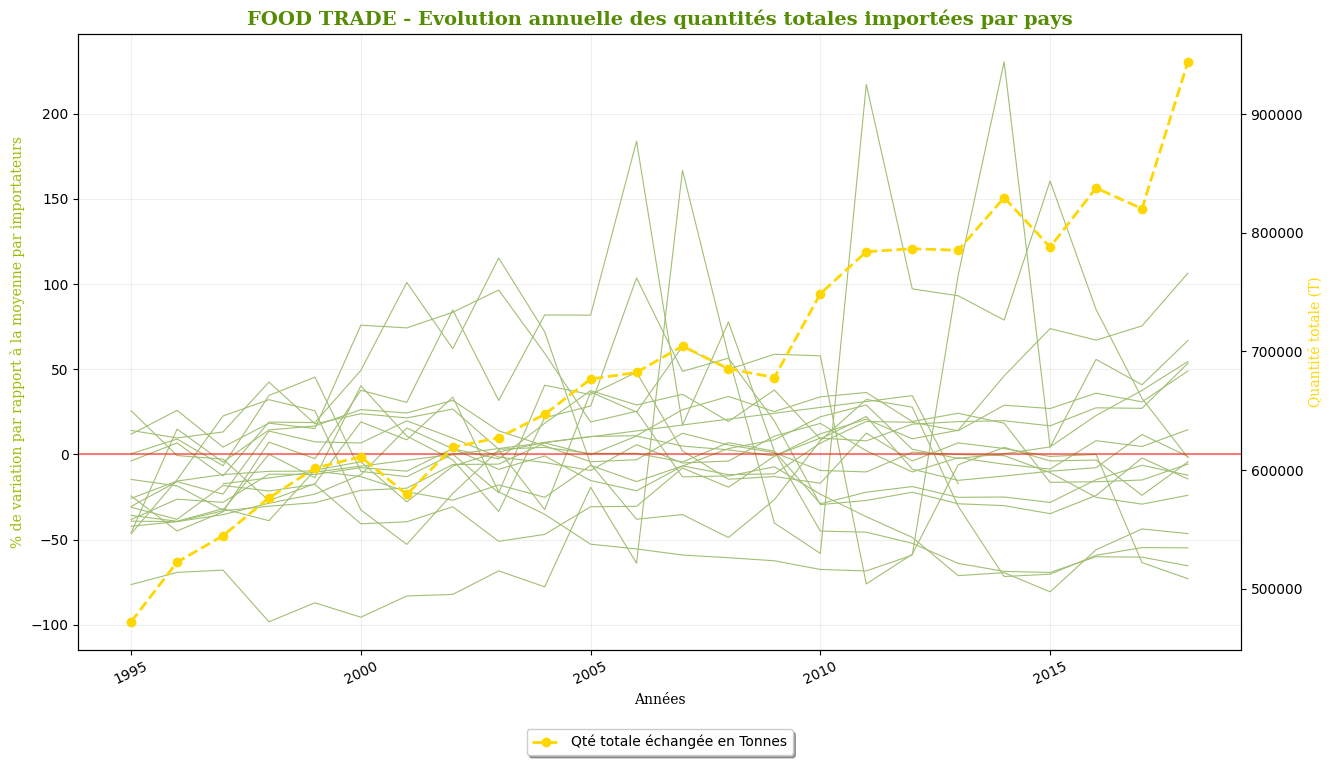

In [15]:
## GRAPHIQUE 
TITLE = "FOOD TRADE - Evolution annuelle des quantités totales importées par pays"

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,8)) # Nombre et disposition des zones de dessin

# Format date xaxis
plt.xticks(rotation=25)

# Axe 1
axes.set_title(TITLE, fontdict={'family': 'serif','color' : '#558C03','weight': 'bold','size': 14})
axes.set_xlabel("Années", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})
axes.set_ylabel("% de variation par rapport à la moyenne par importateurs", fontdict={'family': 'serif','color' : '#97BF04','weight': 'light','size': 10})

for key, value in dict_df_importer.items():
    axes.plot(dict_df_importer[key]['TIME_PERIOD: Time'],dict_df_importer[key]['PCT_CHANGE_MEAN'],'#A1BF73',linewidth=0.8,label=key)

axes.axhline(0, color='red', alpha=0.5)
# axes.legend(loc="center",bbox_to_anchor=(0,0,0.8,-0.4), ncol=1, fancybox=True, shadow=True)
# axes.set_ylim(34.2,34.6)

# Axe 2
axe2 = axes.twinx()
axe2.set_ylabel("Quantité totale (T)", fontdict={'family': 'serif','color' : 'gold','weight': 'light','size': 10})
axe2.plot(df_year['TIME_PERIOD: Time'],df_year.OBS_VALUE,'gold',linestyle='--', marker='o',linewidth=2,label="Qté totale échangée en Tonnes")
axe2.legend(loc="center",bbox_to_anchor=(0,0,1,-0.3), ncol=1, fancybox=True, shadow=True)
# axe2.set_ylim(34.2,34.6)

# Option grille
axes.grid(True,alpha=0.2)

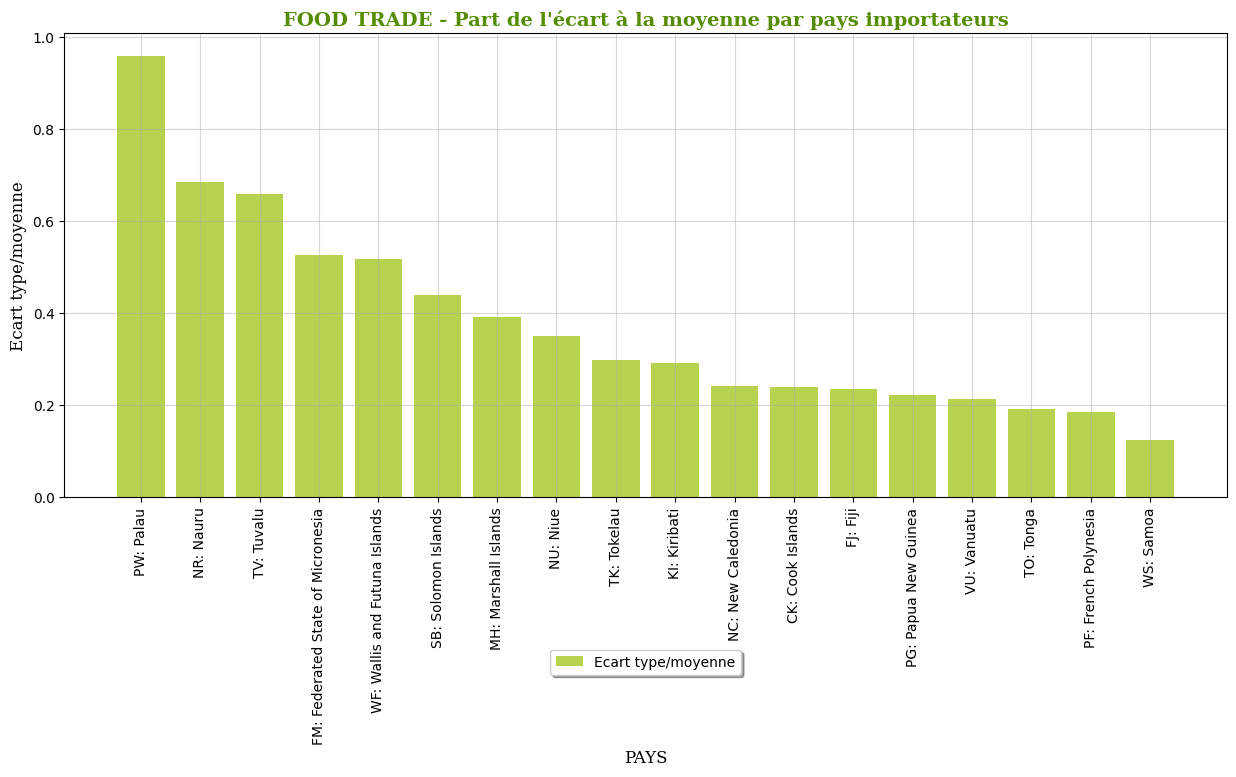

In [15]:
# Graphique
# Paramètres Titre
graph_title = "FOOD TRADE - Part de l'écart à la moyenne par pays importateurs"
title_family = 'serif'   # 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace'
title_color = '#558C03'
title_weight = 'bold'     # 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight'
title_size = 14
title_x = 0.5
title_y = 1

# Paramètres d'axes
x_label = "PAYS"
xtick_rotation = 90

xy_label_family = 'serif'
xy_label_color = 'black'
xy_label_weight = 'light'
xy_label_size = 12

y1_color = '#97BF04'
y1_alpha = 0.7
y1_label = 'Ecart type/moyenne'

y2_color = 'red'
y2_alpha = 0.7
y2_label = 'Valeur cumulée (%)'

graph_linestyle = 'solid'

# Paramètres grille
grid_alpha = 0.5

###########################################################################################################
fig, axe1 = plt.subplots(nrows=1, ncols=1, figsize=(15, 8), sharex=True)
fig.subplots_adjust(bottom=0.3)

plt.xticks(rotation=xtick_rotation)

# Axe n°1
axe1.set_title(graph_title, x=title_x, y=title_y, fontdict={'family': title_family, 'color': title_color, 'weight': title_weight, 'size': title_size})
axe1.set_xlabel(x_label, fontdict={'family': xy_label_family, 'color': xy_label_color, 'weight': xy_label_weight, 'size': xy_label_size})
axe1.set_ylabel(y1_label, fontdict={'family': xy_label_family, 'color': xy_label_color, 'weight': xy_label_weight, 'size': xy_label_size})

axe1.bar(df_final.index.values, df_final.pct,color=y1_color, alpha=y1_alpha, label=y1_label)
axe1.legend(loc="center", bbox_to_anchor=(0, 0, 1, -0.71),ncol=1, fancybox=True, shadow=True)
axe1.grid(True, alpha=grid_alpha)

# Axe n°2
# axe2 = axe1.twinx()
# axe2.set_ylabel(y2_label, fontdict={'family': xy_label_family, 'color': xy_label_color, 'weight': xy_label_weight, 'size': xy_label_size})

# axe2.plot(df_importer_raw.index.values, df_importer_raw.PCT_OBS_VALUE_CUMSUM,color=y2_color, linestyle=graph_linestyle, alpha=y2_alpha, label=y2_label)

# axe2.legend(loc="center", bbox_to_anchor=(0, 0, 1, -0.6),ncol=1, fancybox=True, shadow=True)
# axe2.set_ylim(0, 101)

In [16]:
# Analyse n°5
df_produit_year = df_net.groupby(['COMMODITY: Commodity','TIME_PERIOD: Time'], as_index=False).agg({'OBS_VALUE': 'sum'})
df_year = df_net.groupby(['TIME_PERIOD: Time'], as_index=False).agg({'OBS_VALUE': 'sum'})

dict_df_produit = {}
for produit in df_produit_year['COMMODITY: Commodity'].unique():
    dict_df_produit[produit]=df_produit_year[df_produit_year['COMMODITY: Commodity']==produit]

for key, value in dict_df_produit.items():
    dict_df_produit[key]['PCT_CHANGE_MEAN'] = (dict_df_produit[key]['OBS_VALUE']-dict_df_produit[key]['OBS_VALUE'].mean())/dict_df_produit[key]['OBS_VALUE'].mean()*100
    dict_df_produit[key]['PCT_CHANGE_START'] = (dict_df_produit[key]['OBS_VALUE']-dict_df_produit[key]['OBS_VALUE'].iloc[0])/dict_df_produit[key]['OBS_VALUE'].iloc[0]*100

df_year['PCT_CHANGE_START']=(df_year['OBS_VALUE']-df_year['OBS_VALUE'].iloc[0])/df_year['OBS_VALUE'].iloc[0]*100
print(df_year)

    TIME_PERIOD: Time  OBS_VALUE  PCT_CHANGE_START
0                1995     472072          0.000000
1                1996     522320         10.644139
2                1997     544694         15.383670
3                1998     576511         22.123532
4                1999     601649         27.448567
5                2000     611209         29.473682
6                2001     579409         22.737421
7                2002     619244         31.175753
8                2003     627302         32.882696
9                2004     646992         37.053670
10               2005     676689         43.344447
11               2006     682309         44.534944
12               2007     704528         49.241641
13               2008     685415         45.192894
14               2009     678037         43.629997
15               2010     748692         58.596994
16               2011     784078         66.092884
17               2012     786597         66.626489
18               2013     78532

C:\Users\Sloutmyv\AppData\Local\Temp\ipykernel_17428\2237523838.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dict_df_produit[key]['PCT_CHANGE_MEAN'] = (dict_df_produit[key]['OBS_VALUE']-dict_df_produit[key]['OBS_VALUE'].mean())/dict_df_produit[key]['OBS_VALUE'].mean()*100
C:\Users\Sloutmyv\AppData\Local\Temp\ipykernel_17428\2237523838.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dict_df_produit[key]['PCT_CHANGE_START'] = (dict_df_produit[key]['OBS_VALUE']-dict_df_produit[key]['OBS_VALUE'].il

C:\Users\Sloutmyv\AppData\Local\Temp\ipykernel_17428\1215115888.py:23: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in leg.legendHandles:


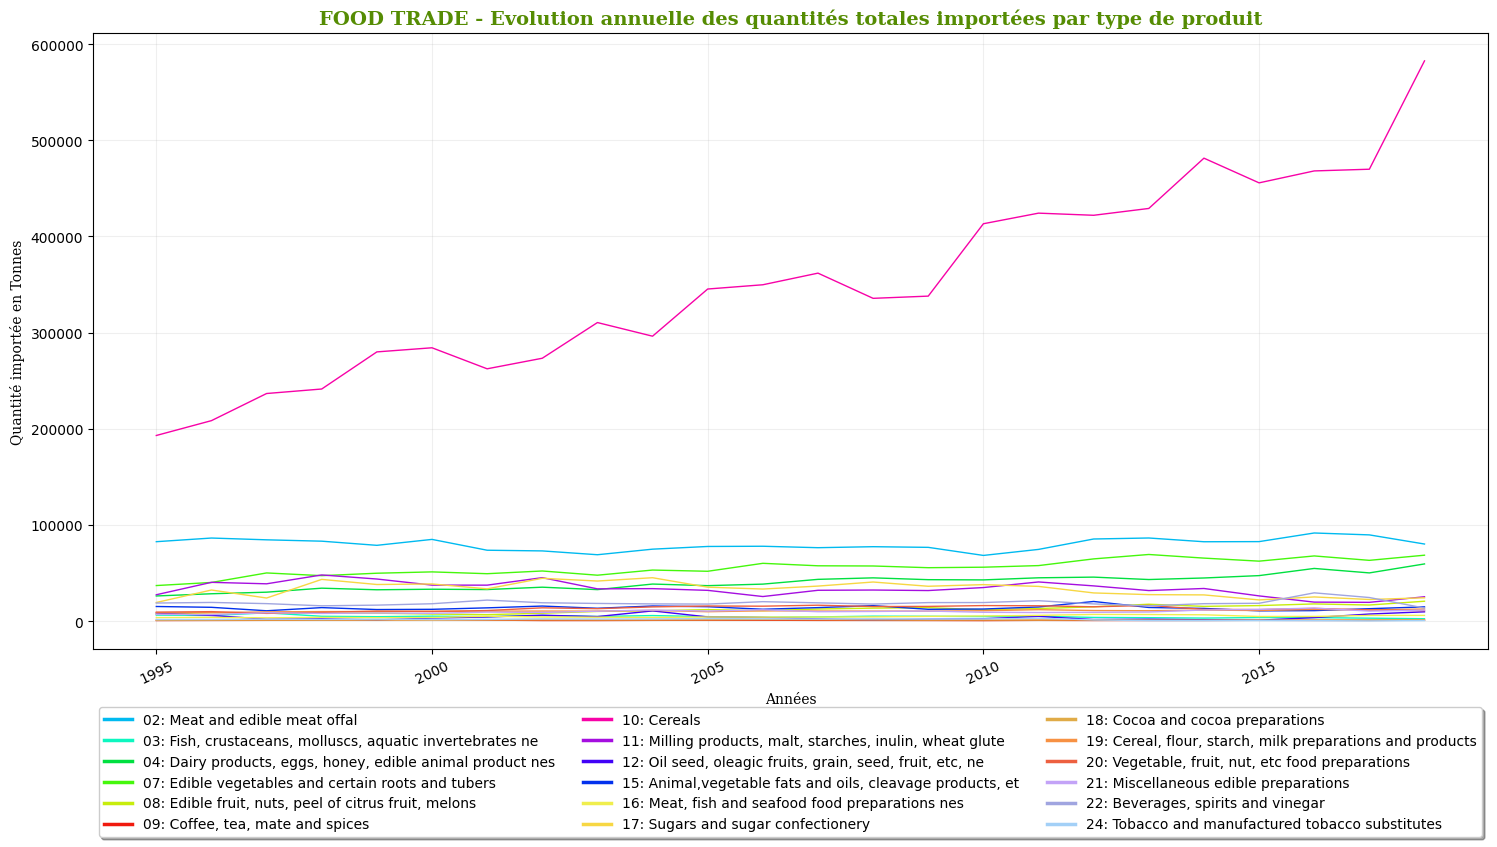

In [17]:
# GRAPHIQUE 
TITLE = "FOOD TRADE - Evolution annuelle des quantités totales importées par type de produit"

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18,8)) # Nombre et disposition des zones de dessin

# Format date xaxis
plt.xticks(rotation=25)

# Axe 1
axes.set_title(TITLE, fontdict={'family': 'serif','color' : '#558C03','weight': 'bold','size': 14})
axes.set_xlabel("Années", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})
axes.set_ylabel("Quantité importée en Tonnes", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})

color = ['#00BAF0','#0CF7C0','#00E040','#45F70C','#C7ED0C','#F01A0E','#F702A7','#A50EE0','#4102F7','#0231ED','#F0EE4D','#F7D743','#E0AB47','#F79143','#ED6040','#C3A3F7','#A0A5E0','#A3D0F7']
i = 0
for key, value in dict_df_produit.items():
    axes.plot(dict_df_produit[key]['TIME_PERIOD: Time'],dict_df_produit[key]['OBS_VALUE'],color[i],linewidth=1,label=key)
    i+=1
# axes.set_yscale('log')

leg = axes.legend(loc="center",bbox_to_anchor=(0,0,1,-0.4), ncol=3, fancybox=True, shadow=True)
# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.5)
# axes.set_ylim(0,100000)

# Option grille
axes.grid(True,alpha=0.2)

C:\Users\Sloutmyv\AppData\Local\Temp\ipykernel_17428\806255742.py:24: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in leg.legendHandles:


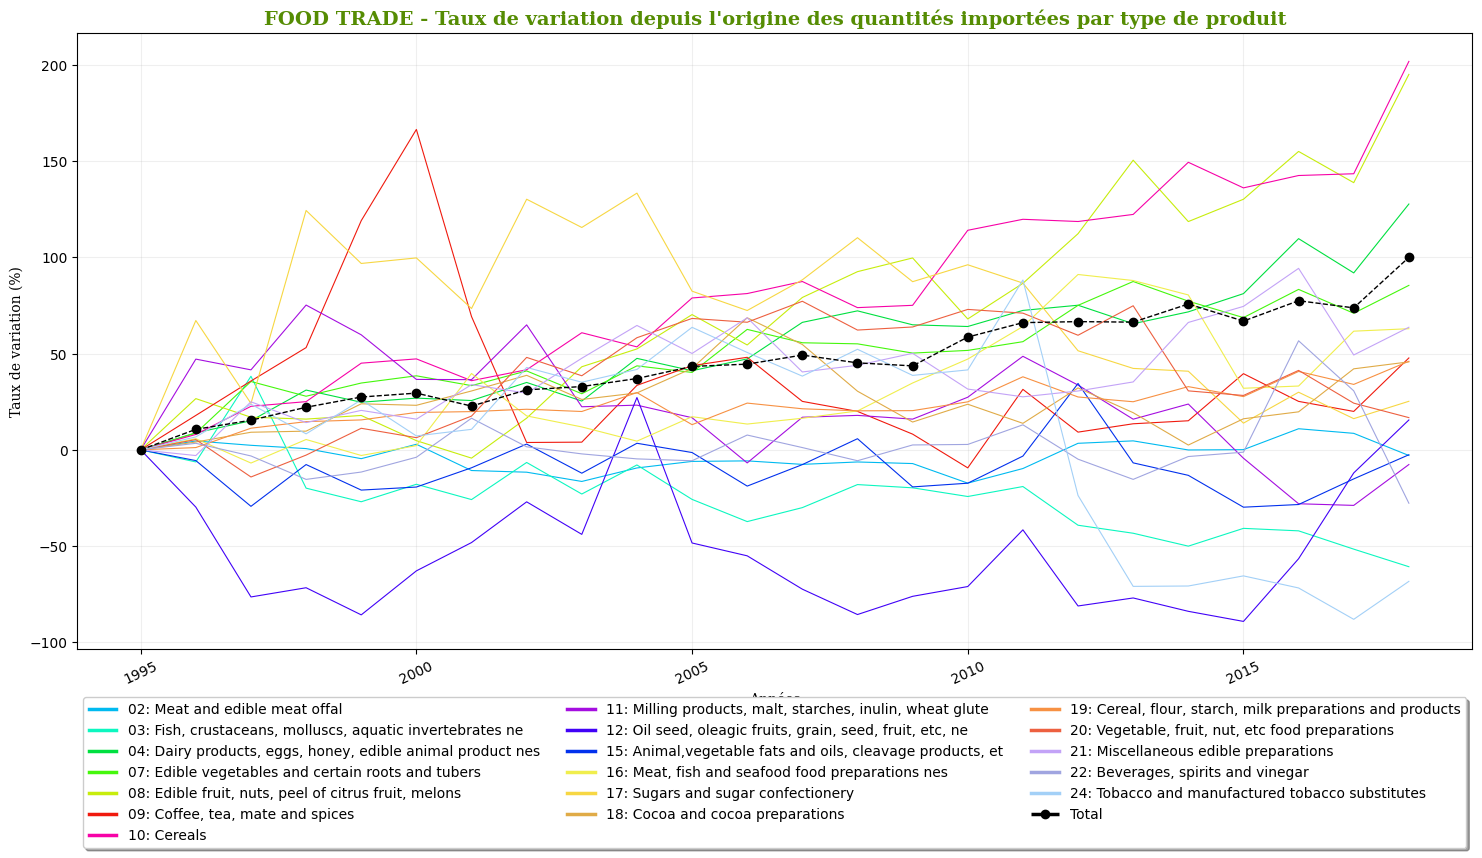

In [18]:
# GRAPHIQUE 
TITLE = "FOOD TRADE - Taux de variation depuis l'origine des quantités importées par type de produit"

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18,8)) # Nombre et disposition des zones de dessin

# Format date xaxis
plt.xticks(rotation=25)

# Axe 1
axes.set_title(TITLE, fontdict={'family': 'serif','color' : '#558C03','weight': 'bold','size': 14})
axes.set_xlabel("Années", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})
axes.set_ylabel("Taux de variation (%)", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})

color = ['#00BAF0','#0CF7C0','#00E040','#45F70C','#C7ED0C','#F01A0E','#F702A7','#A50EE0','#4102F7','#0231ED','#F0EE4D','#F7D743','#E0AB47','#F79143','#ED6040','#C3A3F7','#A0A5E0','#A3D0F7']
i = 0
for key, value in dict_df_produit.items():
    axes.plot(dict_df_produit[key]['TIME_PERIOD: Time'],dict_df_produit[key]['PCT_CHANGE_START'],color[i],linewidth=0.8,label=key)
    i+=1
axes.plot(df_year['TIME_PERIOD: Time'],df_year['PCT_CHANGE_START'],'black',linestyle='--', marker='o',linewidth=1,label='Total')
# axes.set_yscale('log')

leg = axes.legend(loc="center",bbox_to_anchor=(0,0,1,-0.4), ncol=3, fancybox=True, shadow=True)
# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.5)
# axes.set_ylim(0,100000)

# Option grille
axes.grid(True,alpha=0.2)

In [19]:
df_cereal = df_net[df_net['COMMODITY: Commodity']=='10: Cereals']
df_cereal_year = df_cereal.groupby(['IMPORTER: Importer','TIME_PERIOD: Time'], as_index=False).agg({'OBS_VALUE': 'sum'})
df_pivot_cereal_year = df_cereal_year.pivot_table(columns='IMPORTER: Importer', index='TIME_PERIOD: Time', values='OBS_VALUE')
df_pivot_cereal_year.loc[:,'Total'] = df_pivot_cereal_year.sum(numeric_only=True, axis=1)
df_pivot_cereal_year = df_pivot_cereal_year.sort_values(by=['Total'], ascending=False)
df_pivot_cereal_year = df_pivot_cereal_year[df_pivot_cereal_year.sum().sort_values(ascending = False).index]
df_pivot_cereal_year=df_pivot_cereal_year.drop("Total", axis=1)

# print(df_pivot_cereal_year)

[Text(0, 0.5, '2018'),
 Text(0, 1.5, '2014'),
 Text(0, 2.5, '2017'),
 Text(0, 3.5, '2016'),
 Text(0, 4.5, '2015'),
 Text(0, 5.5, '2013'),
 Text(0, 6.5, '2011'),
 Text(0, 7.5, '2012'),
 Text(0, 8.5, '2010'),
 Text(0, 9.5, '2007'),
 Text(0, 10.5, '2006'),
 Text(0, 11.5, '2005'),
 Text(0, 12.5, '2009'),
 Text(0, 13.5, '2008'),
 Text(0, 14.5, '2003'),
 Text(0, 15.5, '2004'),
 Text(0, 16.5, '2000'),
 Text(0, 17.5, '1999'),
 Text(0, 18.5, '2002'),
 Text(0, 19.5, '2001'),
 Text(0, 20.5, '1998'),
 Text(0, 21.5, '1997'),
 Text(0, 22.5, '1996'),
 Text(0, 23.5, '1995')]

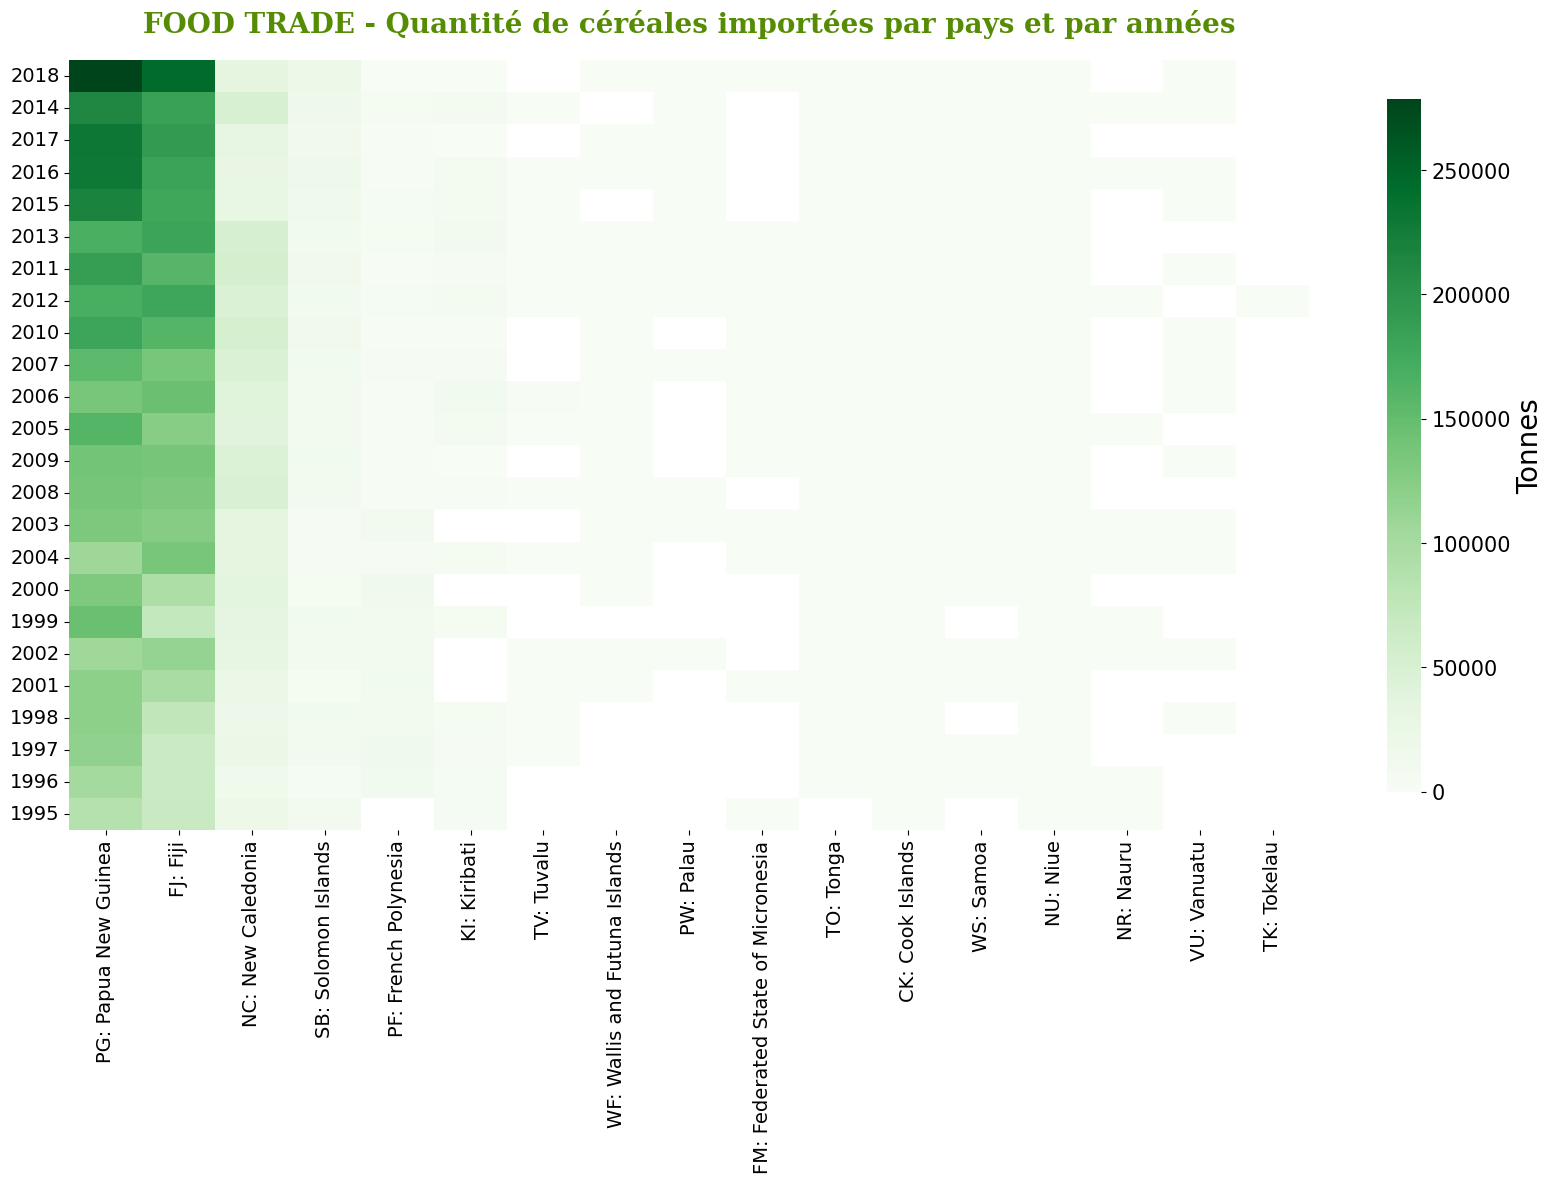

In [20]:
## GRAPHIQUE - heatmap legume
TITLE = "FOOD TRADE - Quantité de céréales importées par pays et par années"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) # Nombre et disposition des zones de dessin

ax.set_title(TITLE, fontdict={'family': 'serif','color' : '#558C03','weight': 'bold','size': 20},pad=20)
ax = sns.heatmap(df_pivot_cereal_year, annot=False, square=False, cmap="Greens", cbar_kws={'label': 'Tonnes', 'location' : 'right',"shrink": 0.9})
ax.set(xlabel="", ylabel="")
ax.figure.axes[-1].set_ylabel('Tonnes', size=20)
ax.figure.axes[-1].tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, rotation=0)

In [21]:
file_name = "TWB_POP.csv"
file_path = "data/THEWORLDBANK/"

# Open CSV file in pandas
df_raw_2 = pd.read_csv(file_path + file_name,sep = ';',index_col=0)
df_final = df_raw_2.transpose()
df_final = df_final[df_final.sum().sort_values(ascending=False).index[0:]]

df_final_tv_sum = df_final
df_final_tv_sum['Total'] = df_final_tv_sum.sum(axis=1, numeric_only=True)
df_final_tv_sum = df_final_tv_sum.iloc[:, :].apply(lambda x: (x*100 / x.iloc[0])-100)

df_final_tv = df_final.iloc[:, :].apply(lambda x: (x*100 / x.iloc[0])-100)
df_final_tv = df_final_tv.drop('Total',axis=1)
df_final = df_final.drop('Total',axis=1)
# print(df_final.columns.to_list())
# print(df_final_tv)

PG: Papua New Guinea
FJ: Fiji
SB: Solomon Islands
PF: French Polynesia
NC: New Caledonia
VU: Vanuatu
WS: Samoa
FM: Federated State of Micronesia
TO: Tonga
KI: Kiribati
MH: Marshall Islands
PW: Palau
NR: Nauru
TV: Tuvalu


C:\Users\Sloutmyv\AppData\Local\Temp\ipykernel_17428\3930849914.py:34: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in leg.legendHandles:


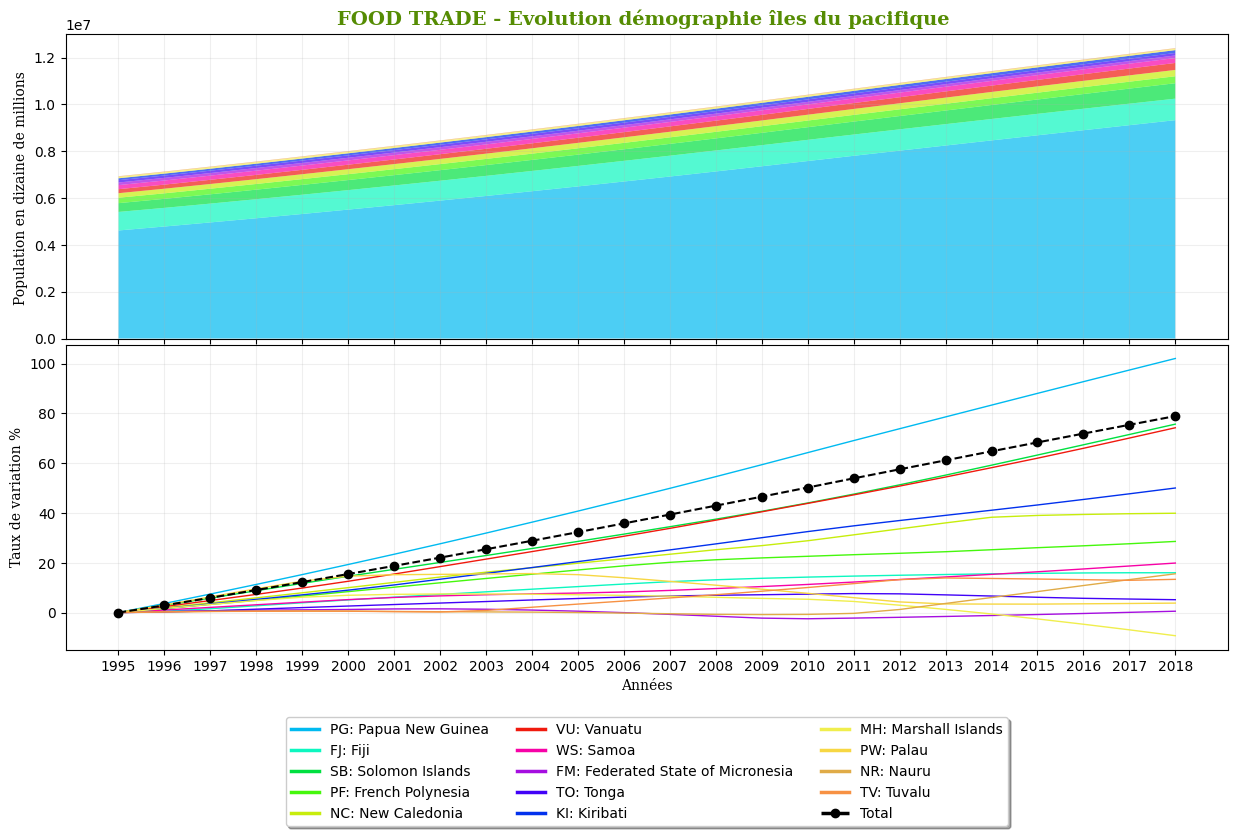

In [22]:
## GRAPHIQUE SIMPLE - Puissance et combustible
TITLE = "FOOD TRADE - Evolution démographie îles du pacifique " # Titre de la figure

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,8)) # Nombre et disposition des zones de dessin
fig.subplots_adjust(hspace=0.02)

# Zone 1
axes[0].set_title(TITLE, fontdict={'family': 'serif','color' : '#558C03','weight': 'bold','size': 14})
axes[0].set_xlabel("Années", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})
axes[0].set_ylabel("Population en dizaine de millions ", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})

color = ['#00BAF0','#0CF7C0','#00E040','#45F70C','#C7ED0C','#F01A0E','#F702A7','#A50EE0','#4102F7','#0231ED','#F0EE4D','#F7D743','#E0AB47','#F79143','#ED6040','#C3A3F7','#A0A5E0','#A3D0F7']
axes[0].stackplot(df_final.index.values,[df_final[pays] for pays in df_final.columns.to_list()], colors = color, alpha = 0.7)
axes[0].grid(True,alpha=0.2)

# Zone 2
axes[1].set_xlabel("Années", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})
axes[1].set_ylabel("Taux de variation %", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})

color = ['#00BAF0','#0CF7C0','#00E040','#45F70C','#C7ED0C','#F01A0E','#F702A7','#A50EE0','#4102F7','#0231ED','#F0EE4D','#F7D743','#E0AB47','#F79143','#ED6040','#C3A3F7','#A0A5E0','#A3D0F7']
i = 0
for pays in df_final_tv.columns.to_list():
    print(pays)
    axes[1].plot(df_final_tv.index.values,df_final_tv[pays],color[i],linewidth=1,label=pays)
    i+=1
axes[1].plot(df_final_tv_sum.index.values,df_final_tv_sum['Total'],'black',linestyle='--', marker='o',linewidth=1.5,label='Total')
axes[1].grid(True,alpha=0.2)


# Légende
leg = axes[1].legend(loc="center",bbox_to_anchor=(0,0,1,-0.8), ncol=3, fancybox=True, shadow=True)

# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.5)

In [23]:
df_pop = df_final
df_quantity_year = df_net.groupby(['IMPORTER: Importer','TIME_PERIOD: Time'], as_index=False).agg({'OBS_VALUE': 'sum'})
df_pivot_quantity_year = df_quantity_year.pivot_table(columns='IMPORTER: Importer', index='TIME_PERIOD: Time', values='OBS_VALUE')
df_final_q = pd.DataFrame(df_pivot_quantity_year.to_records())
df_final_q.set_index('TIME_PERIOD: Time', inplace=True)
df_final_q = df_final_q.drop(['CK: Cook Islands','NU: Niue','WF: Wallis and Futuna Islands','TK: Tokelau'],axis=1)

df_pop.index.names = ['TIME_PERIOD: Time']

df_final_q.sort_index(axis=1, inplace=True)
df_pop.sort_index(axis=1, inplace=True)

df_value_per_pop = df_final_q.divide(df_pop.values)
df_value_per_pop = df_value_per_pop.iloc[:, :].apply(lambda x: x*1000)
df_value_per_pop = df_value_per_pop[df_value_per_pop.sum().sort_values(ascending=False).index[0:]]
print(df_value_per_pop)

                    NR: Nauru  NC: New Caledonia    FJ: Fiji  \
TIME_PERIOD: Time                                              
1995               379.507561         226.152640  177.971236   
1996               299.081682         210.033204  176.323038   
1997               292.289877         230.863180  192.764600   
1998               218.753011         203.220982  198.295466   
1999               248.483097         296.304263  201.802964   
2000               357.521442         306.232706  219.686514   
2001               326.353373         226.670777  220.988447   
2002               402.086755         286.961037  256.625850   
2003               234.918794         307.502131  254.706363   
2004               195.549105         319.549727  285.519457   
2005               142.857143         324.882670  264.647289   
2006               134.738683         321.416755  290.777877   
2007               124.281679         360.263323  272.986634   
2008               119.789124         37

[Text(0, 0.5, '1995'),
 Text(0, 1.5, '1996'),
 Text(0, 2.5, '1997'),
 Text(0, 3.5, '1998'),
 Text(0, 4.5, '1999'),
 Text(0, 5.5, '2000'),
 Text(0, 6.5, '2001'),
 Text(0, 7.5, '2002'),
 Text(0, 8.5, '2003'),
 Text(0, 9.5, '2004'),
 Text(0, 10.5, '2005'),
 Text(0, 11.5, '2006'),
 Text(0, 12.5, '2007'),
 Text(0, 13.5, '2008'),
 Text(0, 14.5, '2009'),
 Text(0, 15.5, '2010'),
 Text(0, 16.5, '2011'),
 Text(0, 17.5, '2012'),
 Text(0, 18.5, '2013'),
 Text(0, 19.5, '2014'),
 Text(0, 20.5, '2015'),
 Text(0, 21.5, '2016'),
 Text(0, 22.5, '2017'),
 Text(0, 23.5, '2018')]

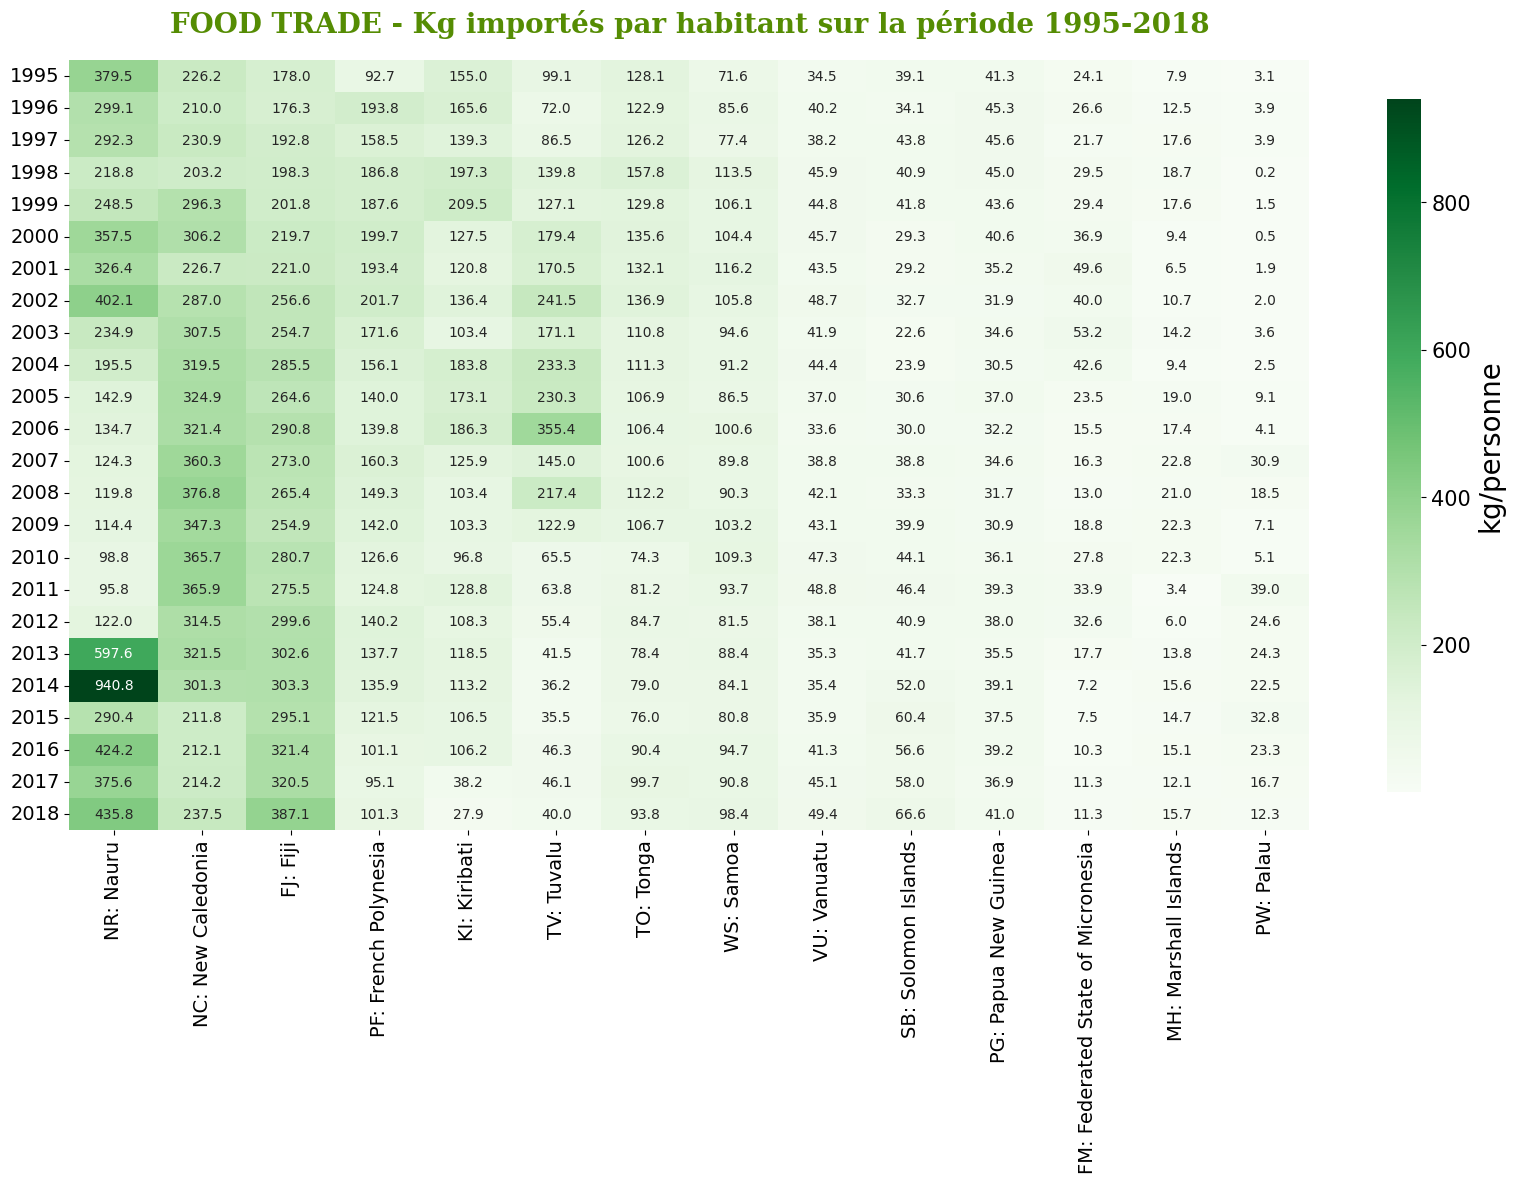

In [24]:
## GRAPHIQUE
TITLE = "FOOD TRADE - Kg importés par habitant sur la période 1995-2018"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) # Nombre et disposition des zones de dessin

ax.set_title(TITLE, fontdict={'family': 'serif','color' : '#558C03','weight': 'bold','size': 20},pad=20)
ax = sns.heatmap(df_value_per_pop, annot=True, square=False, cmap="Greens", cbar_kws={'label': 'kg', 'location' : 'right',"shrink": 0.9},fmt='.1f')
ax.set(xlabel="", ylabel="")
ax.figure.axes[-1].set_ylabel('kg/personne', size=20)
ax.figure.axes[-1].tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, rotation=0)